# Fraud Credit Card Transaction Detector

In [31]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [2]:
ds = pd.read_csv('creditcard.csv')

In [3]:
ds.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [41]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [21]:
ds.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

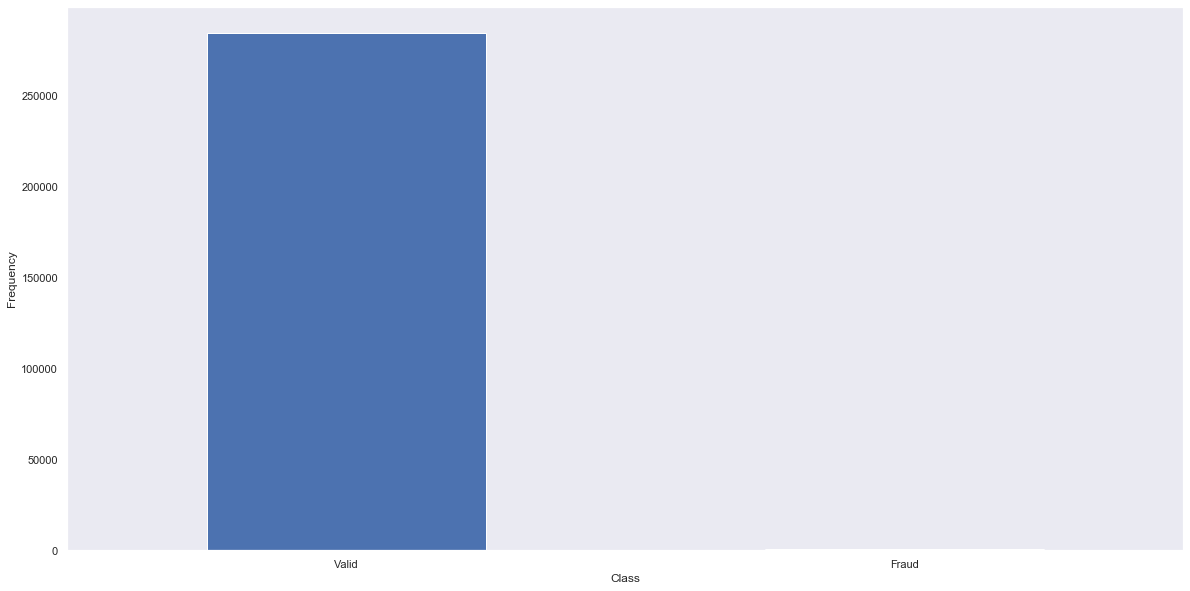

In [22]:
LABELS = ["Valid", "Fraud"]
val_cnt = pd.value_counts(ds['Class'], sort=True)
val_cnt.plot.bar(rot=0)
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [23]:
valid = ds[ds['Class']==0]
fraud = ds[ds['Class']==1]
outliner_fraction = len(fraud)/float(len(valid))

In [24]:
print(valid.shape, fraud.shape)

(284315, 31) (492, 31)


In [25]:
print("Description of Valid Transaction")
valid.Amount.describe()

Description of Valid Transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [26]:
print("Description of Fraud Transaction")
fraud.Amount.describe()

Description of Fraud Transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

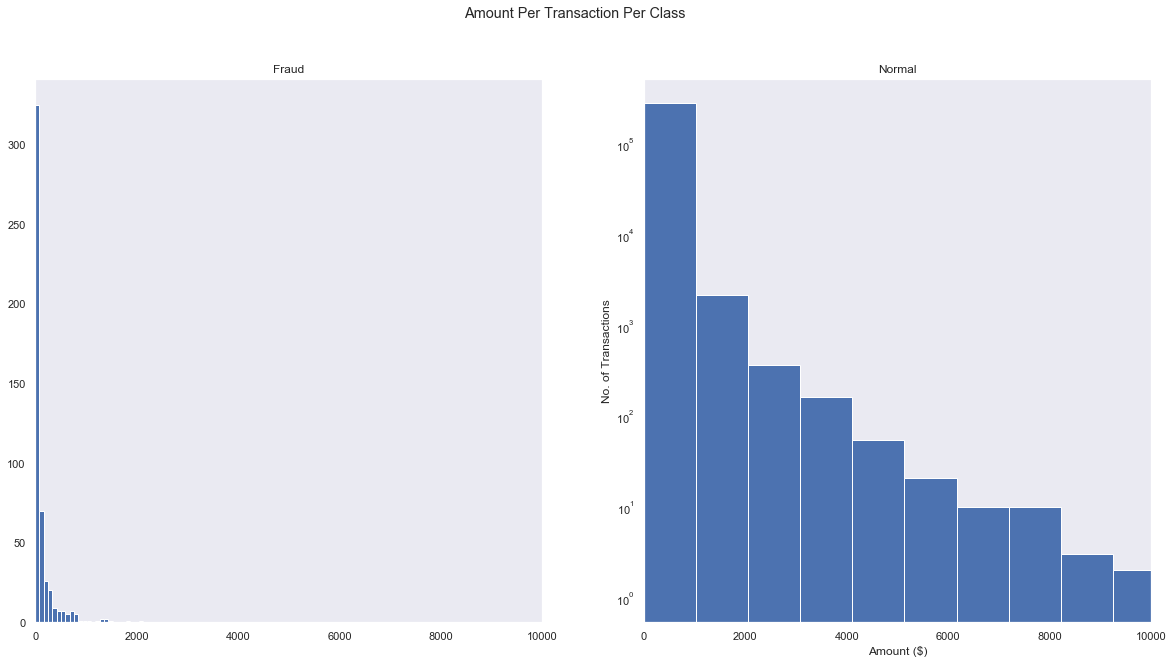

In [42]:
fig, (ax1,ax2) = plt.subplots(1,2,sharex= True)
fig.suptitle("Amount Per Transaction Per Class")
bins = 25
ax2.hist(valid.Amount, bins = bins)
ax2.set_title("Normal")
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title("Fraud")
plt.xlabel("Amount ($)")
plt.ylabel('No. of Transactions')
plt.xlim(0,10000)
plt.yscale('log')
plt.show()

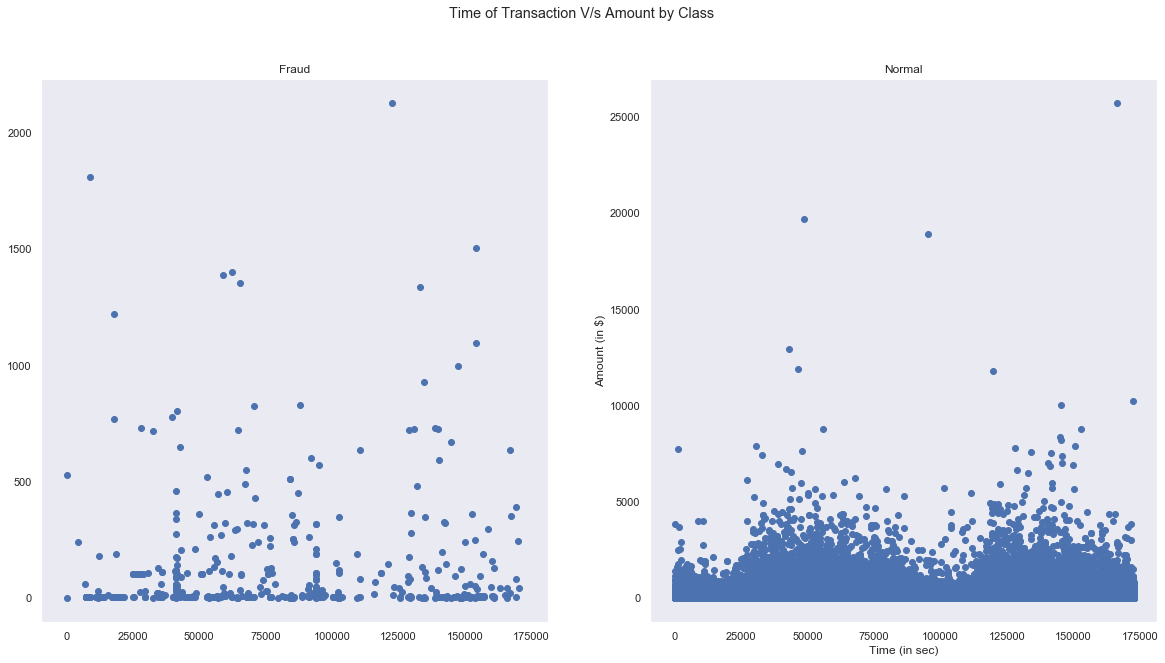

In [33]:
fig, (ax1,ax2) = plt.subplots(1,2,sharex= True)
fig.suptitle("Time of Transaction V/s Amount by Class")
ax2.scatter(valid.Time, valid.Amount)
ax2.set_title("Normal")
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title("Fraud")
plt.xlabel("Time (in sec)")
plt.ylabel("Amount (in $)")
plt.show()

In [34]:
print("Fraud Cases: {}".format(len(fraud)))
print("Valid Cases: {}".format(len(valid)))
print("Outlinear Fraction:",outliner_fraction)

Fraud Cases: 492
Valid Cases: 284315
Outlinear Fraction: 0.0017304750013189597


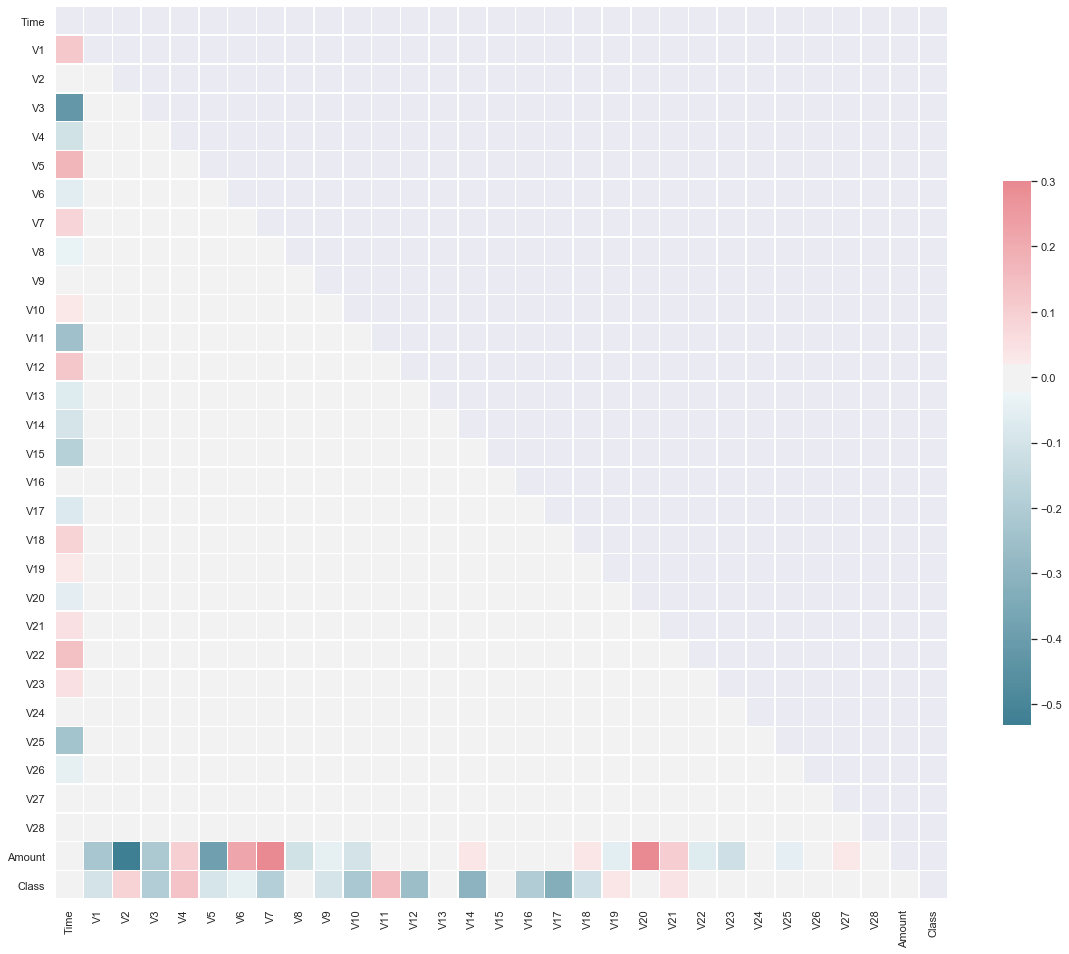

In [35]:
sns.set(style="dark")
corr_mat =ds.corr()
mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [36]:
columns = ds.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]
target = "Class"
state = np.random.RandomState(42)
X = ds[columns]
Y = ds[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [37]:
classifiers = {
    "Isolation Forest": IsolationForest(n_estimators = 100, max_samples = len(X),contamination=outliner_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto',leaf_size=30, metric='minkowski', p=2, metric_params=None, contamination=outliner_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma='scale',nu=0.05,max_iter=-1)
}

In [38]:
type(classifiers)

dict

In [39]:
n_outlinear = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 683
Accuracy Score :
0.9976018847851352
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.31      0.31      0.31       492

    accuracy                           1.00    284807
   macro avg       0.65      0.65      0.65    284807
weighted avg       1.00      1.00      1.00    284807

Local Outlier Factor: 935
Accuracy Score :
0.9967170750718908
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807

Support Vector Machine: 14701
Accuracy Score :
0.9483825889110872
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.95

## Results of the model 


In here we used a total of __284807__ Transactions to determine the following Results:

### Errors:
- __Isolation Forest__ found a total of __638__ errors.
- __Local Outlinear Factor__ found __935__ errors.
- __Support Vector Machine__ found __14701__ errors.

### Accuracy:
- __Isolation Forest__ showed an accuracy of __99.76%__.
- __Local Outlinear Factor__ showed an accuracy of __99.67%__.
- __Support Vector Machine__ showed an accuracy of __94.83%__.

### Precision:
- __Isolation Forest__ had a precision of __31%__.
- __Local Outlinear Factor__ had a precision of __5%__.
- __Support Vector Machine__ had a precision of __0%__.


## Conclusion:

By the above results we can say that, <br><font color= blue> __Isolation Forest Prediction Model__ Performed The Best to Determine the Fraud Cases. <font>

A Project By Achint Khanna for Foxmula-Y (internship)<br>
Group ID (GID): -D0v4iImG<br>
User ID(UID): _DJQqZjSW<br>